In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import classification_report, confusion_matrix
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', None)

In [2]:
#Rreading the CSV and Printing its shape 
df = pd.read_csv(r'C:\VS_code_All_progrmas\project\Dataset\emp_promotion.csv')
print("shape of the train data{}",format(df.shape))

shape of the train data{} (54808, 14)


In [3]:
df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


Univariate Analysis

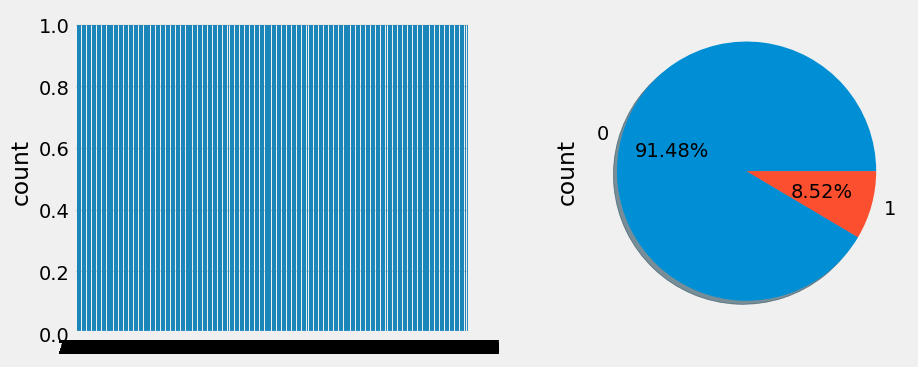

In [4]:
# Data is imbalanced

plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(df['is_promoted'])
plt.subplot(122)
df['is_promoted'].value_counts().plot(kind='pie', autopct='%.2f%%',shadow=True)
plt.show()

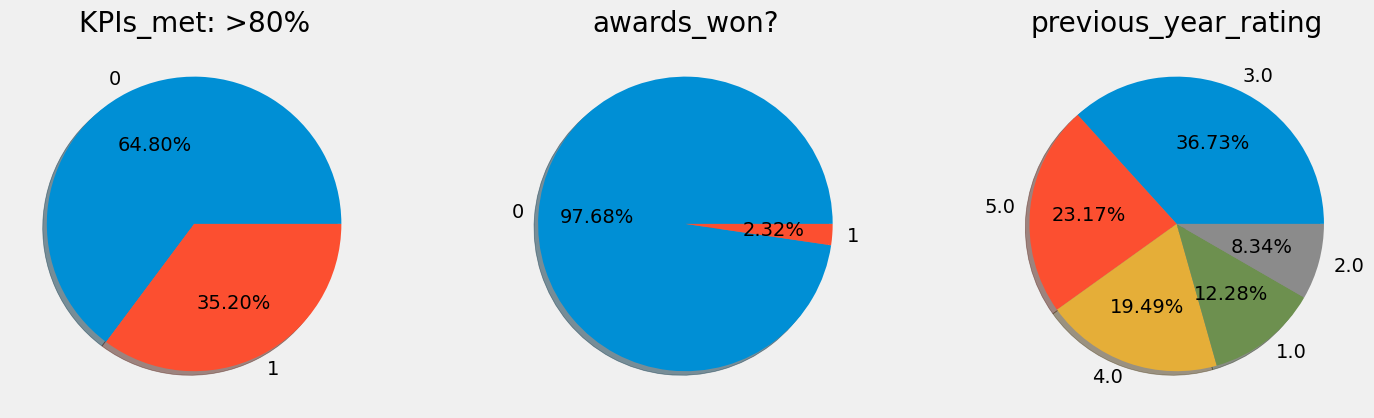

In [5]:
plt.figure(figsize=(16,10))
plt.subplot(231) 
plt.axis('off')
plt.title('KPIs_met: >80%')
df['KPIs_met >80%'].value_counts().plot(kind='pie', shadow=True, autopct = '%.2f%%')
plt.subplot(232)
plt.axis('off')
plt.title('awards_won?')
df['awards_won?'].value_counts().plot(kind='pie', shadow=True, autopct = '%.2f%%')
plt.subplot(233)
plt.axis('off')
plt.title('previous_year_rating')
df['previous_year_rating'].value_counts().plot(kind='pie', shadow=True, autopct = '%.2f%%')
plt.show()

<Axes: ylabel='avg_training_score'>

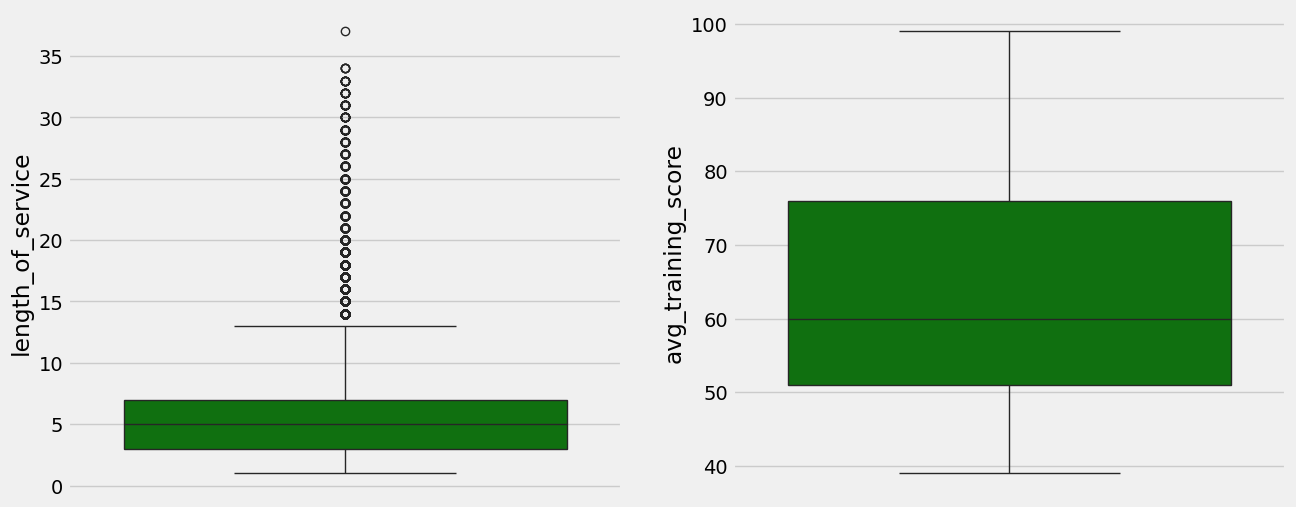

In [6]:
# Length of services column has outliers
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.boxplot(df['length_of_service'], color='g')
plt.subplot(122)
sns.boxplot(df[ 'avg_training_score'], color='g')

MULTIVARIATE ANALYSIS

<Axes: xlabel='avg_training_score', ylabel='previous_year_rating'>

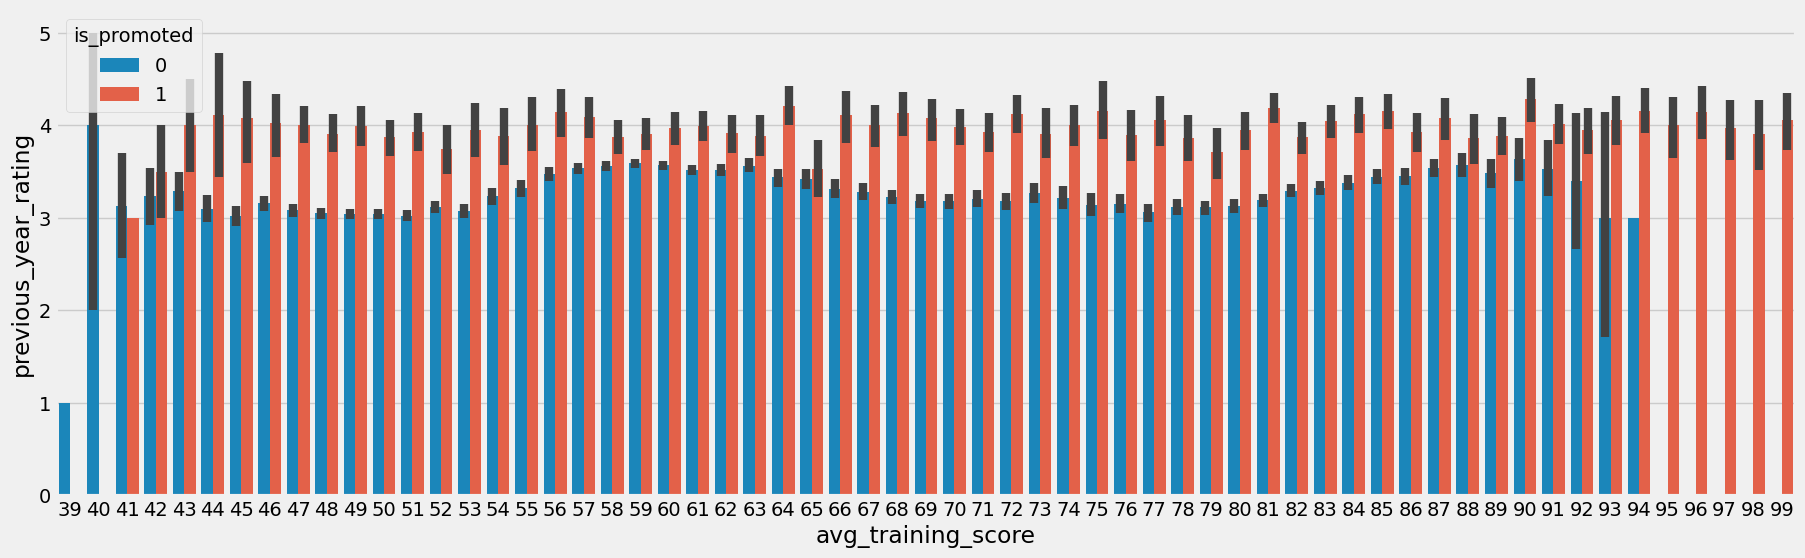

In [7]:
"""From the below bar plot, we came to know that employee with training score > 95 & previous year rating > 3 got promoted."""
plt.figure(figsize=(20,6))
sns.barplot(x='avg_training_score', y='previous_year_rating', hue='is_promoted', data=df)

In [8]:
df.describe(include='all')


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


DATA PRE-PROCESSING

In [9]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Drop Unwanted Features

In [10]:
'''to predict the promotion,employe id is not required and even sex feature is also not
 imporrtant for promotion,region and recuritment channel is not important . so , removing employe id 
 ,sex , recuritment_channel ,and region'''

df = df.drop(['employee_id','gender','region','recruitment_channel'],axis=1)

checking for null values

In [11]:
df.isnull().sum()

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
#replacing nan with mode

print(df['education'].value_counts)
df['education'] = df['education'].fillna(df['education'].mode()[0])

<bound method IndexOpsMixin.value_counts of 0        Master's & above
1              Bachelor's
2              Bachelor's
3              Bachelor's
4              Bachelor's
5              Bachelor's
6              Bachelor's
7        Master's & above
8              Bachelor's
9        Master's & above
10                    NaN
11             Bachelor's
12             Bachelor's
13       Master's & above
14       Master's & above
15             Bachelor's
16             Bachelor's
17             Bachelor's
18             Bachelor's
19             Bachelor's
20             Bachelor's
21                    NaN
22             Bachelor's
23             Bachelor's
24       Master's & above
25             Bachelor's
26             Bachelor's
27             Bachelor's
28             Bachelor's
29             Bachelor's
30             Bachelor's
31             Bachelor's
32                    NaN
33             Bachelor's
34             Bachelor's
35             Bachelor's
36             Bache

In [13]:
#replacing nan with mode

print(df['previous_year_rating'].value_counts())
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode)

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64


REMOVE NEGATIVe DATA

In [14]:
#finding the employee who got promoted even in poor performance . It affect model performance

negative=df[(df['KPIs_met >80%']==0) & (df['awards_won?']==0) & (df['previous_year_rating']==1.0) &
            (df['is_promoted']==1) & (df['avg_training_score']<60)]

negative

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,Sales & Marketing,Bachelor's,1,27,1.0,2,0,0,58,1
51374,Sales & Marketing,Bachelor's,1,31,1.0,5,0,0,58,1


HANDLING OUTLIERS

In [15]:
q1 = np.quantile(df['length_of_service'],0.25)
q3 = np.quantile(df['length_of_service'],0.75)

IQR = q3-q1

upperBound = (1.5*IQR)+q3
lowerBound = (1.5*IQR)-q1

print('q1 :',q1)
print('q3 :',q3)
print('IQR :',IQR)
print('upparBound :',upperBound)
print('loweBound :',lowerBound)
print('skewed data :',len(df['length_of_service']>upperBound))






q1 : 3.0
q3 : 7.0
IQR : 4.0
upparBound : 13.0
loweBound : 3.0
skewed data : 54808


In [16]:
"""here outliers can't removed . employee with higher length of services has higher 
promotion percentAGE so ,capping is done on this feature"""

pd.crosstab([df['length_of_service']>upperBound],df['is_promoted'])


is_promoted,0,1
length_of_service,,
False,46885,4434
True,3255,234


In [17]:
#capping

df['length_of_service']=[upperBound if x>upperBound else x for x in df['length_of_service']]

Handling Categorical Values

In [18]:
# feature mappping is done oon education column 

df['education']= df['education'].replace(("Below Secondary","Bachelor's","Master's & above"),(1,2,3))

In [19]:
lb =LabelEncoder()
df['department']=lb.fit_transform(df['department'])

Handling Imbalanced Data

In [20]:
# !pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

In [21]:
from imblearn.over_sampling import SMOTE

Data types before conversion:
department                int64
education                 int64
no_of_trainings           int64
age                       int64
previous_year_rating     object
length_of_service       float64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object
Data types after conversion:
department                int64
education                 int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service       float64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object


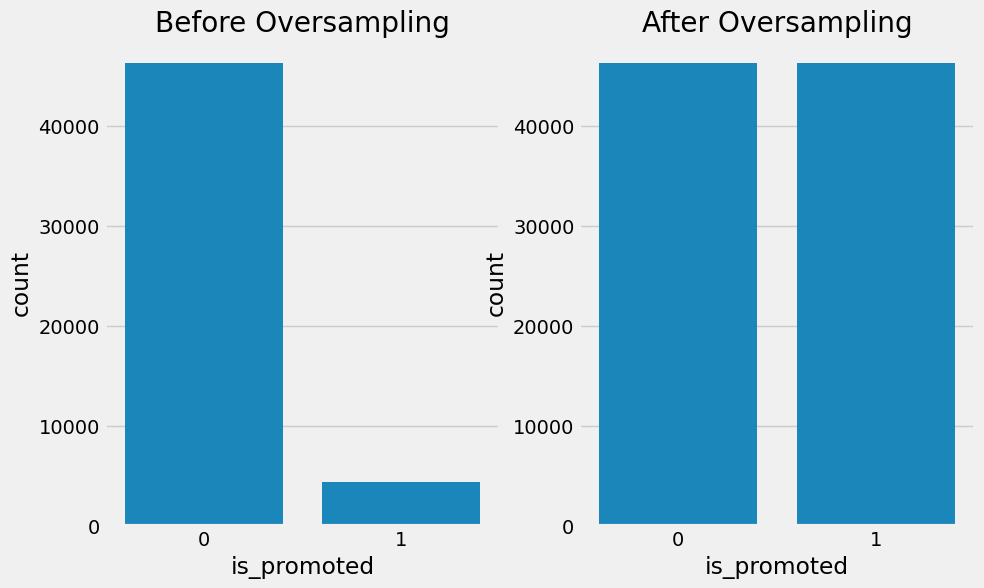

Original dataset shape: is_promoted
0    46355
1     4329
Name: count, dtype: int64
Resampled dataset shape: is_promoted
0    46355
1    46355
Name: count, dtype: int64


In [22]:


# Split the dataset into X (independent variables) and y (dependent variable)
X = df.drop('is_promoted', axis=1)
y = df['is_promoted']

# Check for non-numeric columns
print("Data types before conversion:")
print(X.dtypes)

# Ensure all columns in X are numeric and handle errors
X = X.apply(pd.to_numeric, errors='coerce')

# Check again for non-numeric columns after conversion
print("Data types after conversion:")
print(X.dtypes)

# Drop rows with any NaN values created by coercion
X.dropna(inplace=True)
y = y[X.index]

# Visualize the class distribution before resampling
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.countplot(x=y)
plt.title('Before Oversampling')

# Initialize the SMOTE function with adjusted k_neighbors
smote = SMOTE(random_state=42, k_neighbors=2)

# Apply SMOTE to the data
X_resample, y_resample = smote.fit_resample(X, y)

# Visualize the class distribution after resampling
plt.subplot(122)
sns.countplot(x=y_resample)
plt.title('After Oversampling')
plt.show()

# Show the resampled data
print(f"Original dataset shape: {y.value_counts()}")
print(f"Resampled dataset shape: {pd.Series(y_resample).value_counts()}")



In [23]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=10)

# Display the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (74168, 9)
X_test shape: (18542, 9)
y_train shape: (74168,)
y_test shape: (18542,)


# Decision Tree

In [24]:
def decisionTree(X_train, X_test, y_train, y_test):
    #  parameter grid
    param_grid = {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10],
        'criterion': ['gini', 'entropy']
    }
    
    model = DecisionTreeClassifier(random_state=42)   # Initialize the DecisionTreeClassifier
    
    # Initialize the GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)  
    
    grid_search.fit(X_train, y_train)  # Fit the GridSearchCV on the training data
    
    best_model = grid_search.best_estimator_   # Get the best estimator
        
    y_pred = best_model.predict(X_test)      # Make predictions on the test data
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Best Parameters found by GridSearchCV:")
    print(grid_search.best_params_)
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print(f"Accuracy: {accuracy:.2f}")
    
    return best_model

decisionTree(X_train, X_test, y_train, y_test)  # Call the function with training and testing data



Best Parameters found by GridSearchCV:
{'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}

Confusion Matrix:
[[8668  612]
 [ 453 8809]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9280
           1       0.94      0.95      0.94      9262

    accuracy                           0.94     18542
   macro avg       0.94      0.94      0.94     18542
weighted avg       0.94      0.94      0.94     18542

Accuracy: 0.94


DecisionTreeClassifier(criterion='entropy', max_depth=40, random_state=42)

RANDOM FOREST MODEL

In [25]:
def randomForest(X_train, X_test, y_train, y_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
    
    model = RandomForestClassifier(random_state=42)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)    # Make predictions on the test data
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Best Parameters found by GridSearchCV:")
    print(grid_search.best_params_)
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print(f"Accuracy: {accuracy:.2f}")
    
    return best_model

randomForest(X_train, X_test, y_train, y_test)



Best Parameters found by GridSearchCV:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Confusion Matrix:
[[8959  321]
 [ 421 8841]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      9280
           1       0.96      0.95      0.96      9262

    accuracy                           0.96     18542
   macro avg       0.96      0.96      0.96     18542
weighted avg       0.96      0.96      0.96     18542

Accuracy: 0.96


RandomForestClassifier(bootstrap=False, min_samples_split=5, random_state=42)

# KNN Model


In [26]:
def KNN(X_train, X_test, y_train, y_test):
    
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]
    }

    model = KNeighborsClassifier(n_neighbors=5)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Best Parameters found by GridSearchCV:")
    print(grid_search.best_params_)
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print(f"Accuracy: {accuracy:.2f}")
    
    return best_model

KNN(X_train, X_test, y_train, y_test)



Best Parameters found by GridSearchCV:
{'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Confusion Matrix:
[[8294  986]
 [ 222 9040]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      9280
           1       0.90      0.98      0.94      9262

    accuracy                           0.93     18542
   macro avg       0.94      0.93      0.93     18542
weighted avg       0.94      0.93      0.93     18542

Accuracy: 0.93


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, p=1,
                     weights='distance')

# Xgboost Model


In [27]:
def xgboost(X_train, X_test, y_train, y_test):
    
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0],
        'min_samples_split': [2, 5, 10]
    }
   
    model = GradientBoostingClassifier(random_state=42)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Best Parameters found by GridSearchCV:")
    print(grid_search.best_params_)
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print(f"Accuracy: {accuracy:.2f}")
    
    return best_model

xgboost(X_train, X_test, y_train, y_test)   


Best Parameters found by GridSearchCV:
{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}

Confusion Matrix:
[[8678  602]
 [ 695 8567]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      9280
           1       0.93      0.92      0.93      9262

    accuracy                           0.93     18542
   macro avg       0.93      0.93      0.93     18542
weighted avg       0.93      0.93      0.93     18542

Accuracy: 0.93


GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_split=5,
                           n_estimators=300, random_state=42, subsample=0.8)

In [28]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return cm, cr, accuracy

# Models to compare
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": GradientBoostingClassifier(random_state=42)
}

results = {}

# Evaluate each model
for name, model in models.items():
    cm, cr, accuracy = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"Confusion Matrix": cm, "Classification Report": cr, "Accuracy": accuracy}

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\nClassification Report:")
    print(metrics["Classification Report"])
    print(f"Accuracy: {metrics['Accuracy']:.2f}\n")
    print("-" * 50)


Model: Decision Tree
Confusion Matrix:
[[8642  638]
 [ 427 8835]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9280
           1       0.93      0.95      0.94      9262

    accuracy                           0.94     18542
   macro avg       0.94      0.94      0.94     18542
weighted avg       0.94      0.94      0.94     18542

Accuracy: 0.94

--------------------------------------------------
Model: Random Forest
Confusion Matrix:
[[8892  388]
 [ 403 8859]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9280
           1       0.96      0.96      0.96      9262

    accuracy                           0.96     18542
   macro avg       0.96      0.96      0.96     18542
weighted avg       0.96      0.96      0.96     18542

Accuracy: 0.96

--------------------------------------------------
Model: KNN
Confusion Matrix:
[[7

In [31]:
# def compareModel(X_train, X_test, y_train, y_test):
#     decisionTree(X_train ,X_test , y_train ,y_test)
#     print('-'*100)
#     randomForest(X_train ,X_test , y_train ,y_test)
#     print('-'*100)
#     KNN(X_train ,X_test , y_train ,y_test)
#     print('-'*100)
#     xgboost(X_train ,X_test , y_train ,y_test)
#     print('-'*100)


    

In [32]:
# compareModel(X_train, X_test, y_train, y_test)